In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_drug_df, clinical_trial_df, how='outer', on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
combined_df_grp_drug_time = combined_df.groupby(['Drug','Timepoint'])

# Convert to DataFrame
tumor_response_df = pd.DataFrame(combined_df_grp_drug_time['Tumor Volume (mm3)'].mean()).reset_index()

# Preview DataFrame
tumor_response_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_error_tumor_vol = combined_df_grp_drug_time.sem()

# Convert to DataFrame
std_error_tumor_vol_df = pd.DataFrame(std_error_tumor_vol).reset_index()
std_error_tumor_vol_df = std_error_tumor_vol_df.drop(['Mouse ID', 'Metastatic Sites'], axis=1)

# Preview DataFrame
std_error_tumor_vol_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
mungled_df_tumor_vol = tumor_response_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
mungled_df_tumor_vol.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


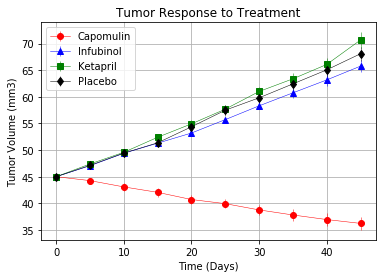

In [5]:
# Generate the Plot (with Error Bars)
plotting_tup = ({'Drug': 'Capomulin', 'Color': 'red', 'Sym': 'o'},
                 {'Drug': 'Infubinol', 'Color': 'blue', 'Sym': '^'},
                 {'Drug': 'Ketapril', 'Color': 'green', 'Sym': 's'},
                 {'Drug': 'Placebo', 'Color': 'black', 'Sym': 'd'})

for x in plotting_tup:
    err = std_error_tumor_vol_df.loc[std_error_tumor_vol_df['Drug'] == x['Drug']]
    tumor_resp_plot = plt.errorbar(mungled_df_tumor_vol.index, mungled_df_tumor_vol[x['Drug']],err['Tumor Volume (mm3)'], color=x['Color'], fmt=x['Sym'], ls='-', linewidth=0.5)

plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.legend()

# Save the Figure
plt.savefig("Tumor Response to treatment.png")

# Show the Figure
plt.show()

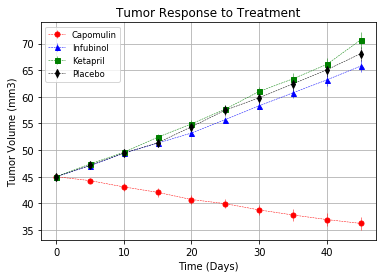

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
metastatic_response_df = pd.DataFrame(combined_df_grp_drug_time['Metastatic Sites'].mean()).reset_index()

# Preview DataFrame
metastatic_response_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
std_error_meta_sites = combined_df_grp_drug_time.sem()

# Convert to DataFrame
std_error_meta_sites_df = pd.DataFrame(std_error_meta_sites).reset_index()
std_error_meta_sites_df = std_error_meta_sites_df.drop(['Mouse ID', 'Tumor Volume (mm3)'], axis=1)

# Preview DataFrame
std_error_meta_sites_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
# Minor Data Munging to Re-Format the Data Frames
mungled_df_meta = metastatic_response_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')

# Preview that Reformatting worked
mungled_df_meta.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [8]:
# THIS IS WRONG IN THE SAMPLE FILE
# THIS IS THE OLD DATA SHOWN IN mungled_df_tumor_vol.head() ABOVE

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


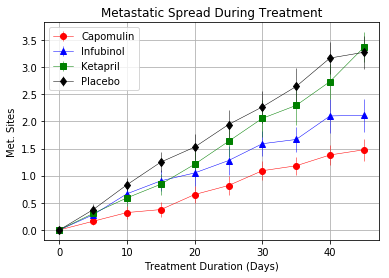

In [9]:
# Generate the Plot (with Error Bars)
for x in plotting_tup:
    err = std_error_meta_sites_df.loc[std_error_meta_sites_df['Drug'] == x['Drug']]
    meta_sites_plot = plt.errorbar(mungled_df_meta.index, mungled_df_meta[x['Drug']],err['Metastatic Sites'], color=x['Color'], fmt=x['Sym'], ls='-', linewidth=0.5)

plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.grid()
plt.legend()

# Save the Figure
plt.savefig("Metastatic Spread During Treatmemnt.png")

# Show the Figure
plt.show()

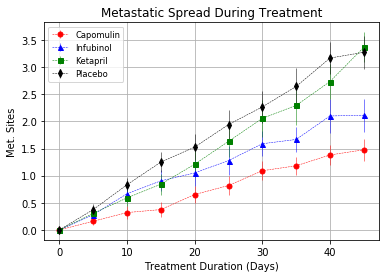

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
mouse_survival_df = pd.DataFrame(combined_df_grp_drug_time['Mouse ID'].count()).reset_index()

# Preview DataFrame
mouse_survival_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
mungled_df_mouse = mouse_survival_df.pivot(index='Timepoint',columns='Drug',values='Mouse ID')

# Preview the Data Frame
mungled_df_mouse.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


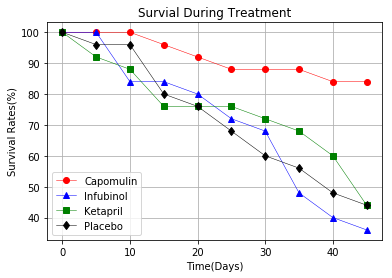

In [12]:
# Generate the Plot (Accounting for percentages)
for x in plotting_tup:
    mouse_survival_plot = plt.plot(mungled_df_mouse.index, mungled_df_mouse[x['Drug']]*100/mungled_df_mouse[x['Drug']][0], color=x['Color'], marker=x['Sym'], ls='-', linewidth=0.5)

plt.title('Survial During Treatment')
plt.xlabel('Time(Days)')
plt.ylabel('Survival Rates(%)')
plt.grid()
plt.legend()

# Save the Figure
plt.savefig("Survial During Treatment.png")

# Show the Figure
plt.show()

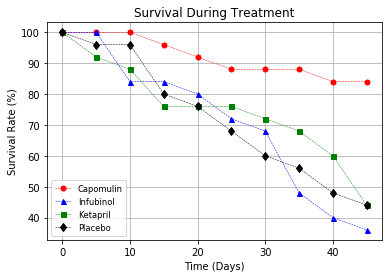

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
drug_per_change = (mungled_df_tumor_vol.iloc[-1] - mungled_df_tumor_vol.iloc[0])*100/ mungled_df_tumor_vol.iloc[0]

# Display the data to confirm
drug_per_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

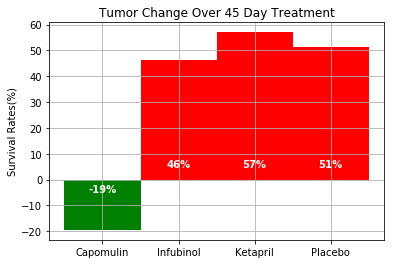

In [14]:
# Store all Relevant Percent Changes into a Tuple
tup1 = (drug_per_change)

# Splice the data between passing and failing drugs
tup1_passed = tup1 > 0

# Orient widths. Add labels, tick marks, etc.
# Use functions to label the percentages of changes
# Call functions to implement the function calls

for idx, val in enumerate(plotting_tup):
    color_plot=np.where(tup1_passed[val['Drug']]==True, 'r','g')
    tumor_change_45days_plot = plt.bar(val['Drug'], tup1[val['Drug']], color = str(color_plot), align='center', width =1)
    y_label = tup1[val['Drug']]
    if y_label < 0: shifter=-5
    else: shifter=5
    y_label = str(int(y_label))+'%'
    plt.text(idx, shifter, y_label, color='w', fontweight='bold', ha='center')
    
plt.title('Tumor Change Over 45 Day Treatment')
plt.ylabel('Survival Rates(%)')
plt.grid()

# Save the Figure
plt.savefig("Tumor Change Over 45 Day Treatment.png")

# Show the Figure
plt.show()